In [48]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns


In [151]:
data = pd.read_csv("Pokemon.csv")

In [9]:
Counter(data["Generation"])

Counter({1: 166, 2: 106, 3: 160, 4: 121, 5: 165, 6: 82})

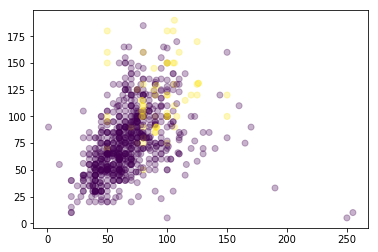

In [22]:
plt.scatter(data["HP"],data["Attack"],c=data["Legendary"],alpha=0.3)

In [179]:
num_cols = data[['HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed']]

In [37]:
num_cols.describe()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500
std,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474
min,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000
50%,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000
75%,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000
max,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000


In [31]:
num_cols.skew()

HP        -1.772204
Attack     0.551614
Defense   -0.782444
Sp. Atk    0.744662
Sp. Def    0.854019
Speed      0.357933
dtype: float64

In [44]:
#num_cols["HP"] = pd.np.log(num_cols.HP)
#num_cols["Defense"] = pd.np.log(num_cols.Defense)

HP


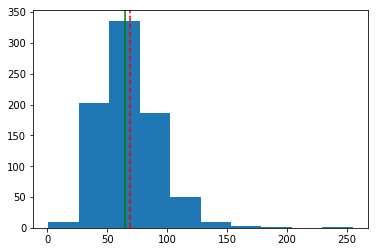

Attack


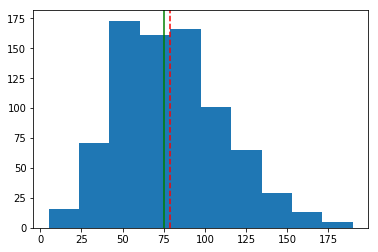

Defense


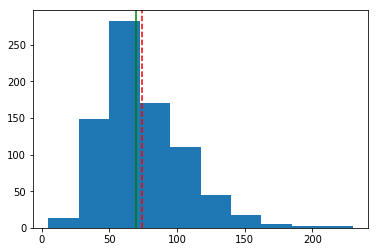

Sp. Atk


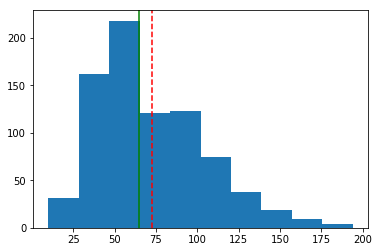

Sp. Def


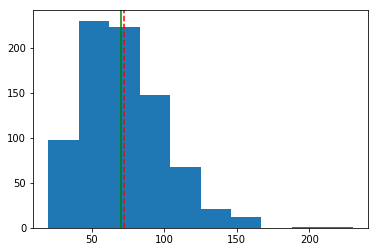

Speed


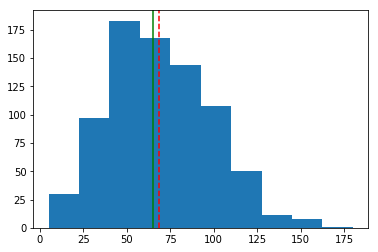

In [46]:
for col in num_cols.columns:
    print(col)
    num_cols[col]
    plt.hist(num_cols[col])
    plt.axvline(num_cols[col].mean(), color='r', linestyle='--')
    plt.axvline(num_cols[col].median(), color='g', linestyle='-')
    plt.show()

In [456]:
NORM_data=(num_cols-num_cols.mean())/num_cols.std()

In [125]:
feature_columns=list(NORM_data.columns)

In [157]:
import umap

reducer = umap.UMAP()

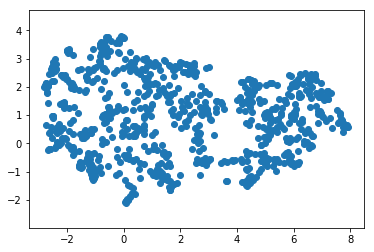

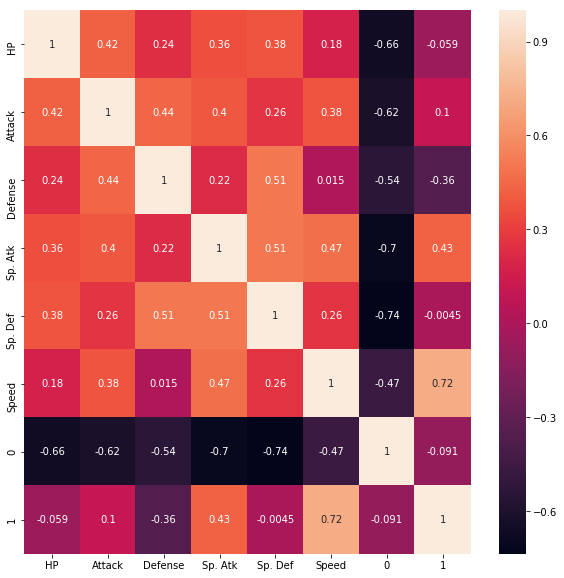

In [457]:
num_cols = data[['HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed']]


embedding = reducer.fit_transform(NORM_data)
embedding.shape
plt.scatter(embedding[:, 0], embedding[:, 1])
plt.gca().set_aspect('equal', 'datalim')
plt.show()
plt.figure(figsize=(10,10))
sns.heatmap(pd.concat([num_cols,pd.DataFrame(embedding)],axis = 1).corr(),annot=True,)
plt.show()


In [262]:
data.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,types,Tankiness,Ninja,Fatboys,fatality,indistructability
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9,1.000000,1.218242,1.000000,1.326531,2205
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,9,1.016129,1.209373,1.000000,1.290323,3780
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,9,1.012195,1.161272,1.000000,1.219512,6640
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,9,1.209836,0.645119,1.000000,1.220000,9840
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,6,0.413462,2.109248,1.666667,1.153846,1677


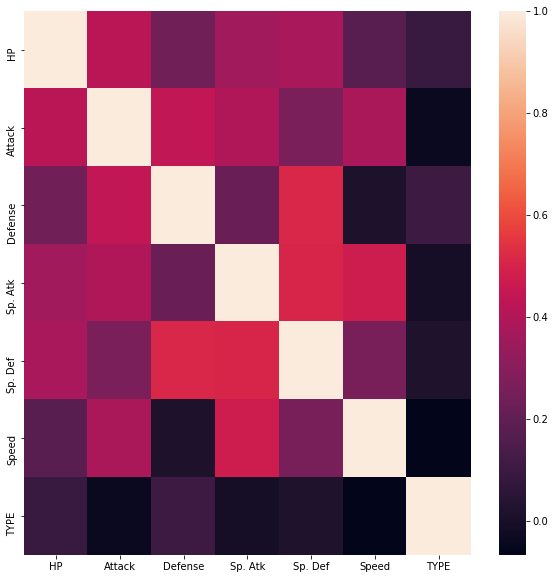

In [427]:
plt.figure(figsize=(10,10))
sns.heatmap(num_cols.assign(TYPE=labelencoder.fit_transform(data["Type 1"])).corr())

/usr/lib/python3/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/lib/python3/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

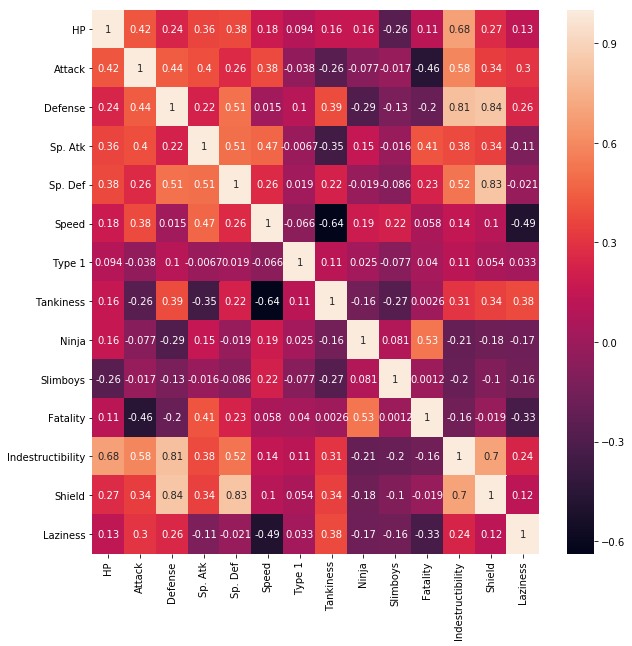

In [463]:
inputData = data[['HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed']]

inputData["Type 1"] = labelencoder.fit_transform(data["Type 1"])
#inputData["Type 2"] = labelencoder.fit_transform(data["Type 2"])


inputData['Tankiness']=((inputData['HP']*inputData['Defense']*inputData['Sp. Def']
                                                   )/(inputData['Speed']*inputData['Attack']*inputData['Sp. Atk']))
inputData['Tankiness']=inputData['Tankiness'].clip(upper=3)
inputData['Ninja']=(inputData['Sp. Atk']*inputData['Speed'])/(inputData['Defense']*inputData['Defense'])
inputData['Slimboys']=(inputData['Speed']/inputData['HP'])
inputData['Fatality']=(inputData['Sp. Atk']/inputData['Attack'])
inputData["Indestructibility"] = inputData["HP"]*inputData["Defense"]
inputData['Shield']=(inputData['Sp. Def']*inputData['Defense'])
inputData['Laziness']=(inputData['Attack']/inputData['Speed'])

plt.figure(figsize=(10,10))
sns.heatmap(inputData.corr(),annot=True)

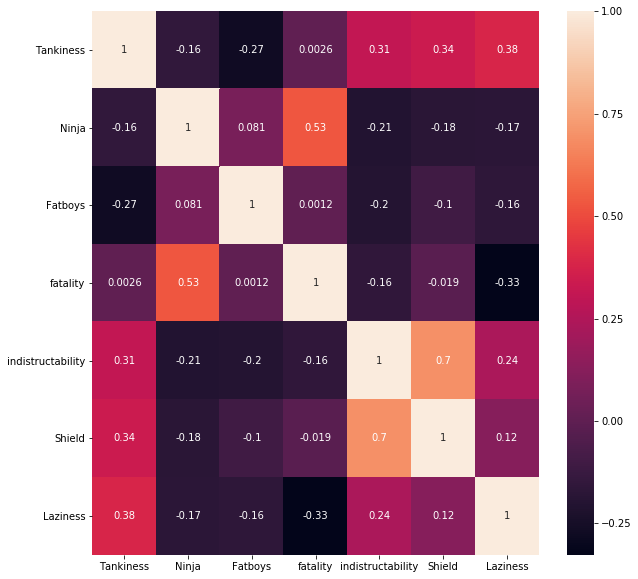

In [464]:
plt.figure(figsize=(10,10))
sns.heatmap(inputData_2[list(inputData_2.columns[7:])].corr(), annot=True)

In [495]:
regi = inputData_2

In [496]:
asdasd = inputData[list(inputData.columns[7:])]

In [497]:
asdasd.skew()

Tankiness             0.813902
Ninja                12.154035
Slimboys             21.768781
Fatality              3.784406
Indestructibility     1.019625
Shield                2.849951
Laziness              6.375233
dtype: float64

/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Ninja
Slimboys
Fatality
Indestructibility
Shield
Laziness


Tankiness            0.813902
Ninja                3.011832
Slimboys             3.706312
Fatality             1.569031
Indestructibility   -0.903779
Shield              -0.409827
Laziness             1.905661
dtype: float64

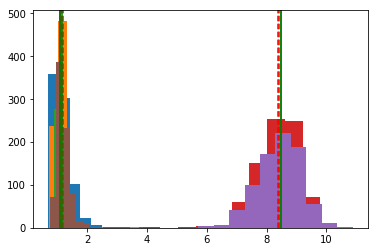

In [498]:
for col in asdasd.columns[1:]:
    asdasd[col] = pd.np.log(asdasd[col] + 2)
    print(col)
    plt.hist(asdasd[col])
    plt.axvline(asdasd[col].mean(), color='r', linestyle='--')
    plt.axvline(asdasd[col].median(), color='g', linestyle='-')
    #plt.show()
    
asdasd.skew()

In [499]:
asdasd.isna().sum()

Tankiness            0
Ninja                0
Slimboys             0
Fatality             0
Indestructibility    0
Shield               0
Laziness             0
dtype: int64

In [500]:
for col in ["Ninja","Slimboys","Fatality","Laziness"]:
    asdasd[col] = pd.np.log(asdasd[col])

print(asdasd.isna().sum())

/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Tankiness            0
Ninja                0
Slimboys             0
Fatality             0
Indestructibility    0
Shield               0
Laziness             0
dtype: int64


In [501]:
asdasd.skew()

Tankiness            0.813902
Ninja                0.930864
Slimboys             0.775882
Fatality             0.717776
Indestructibility   -0.903779
Shield              -0.409827
Laziness             0.830851
dtype: float64

In [545]:
NORMED_ASD = (asdasd-asdasd.mean())/asdasd.std()

In [539]:
'''#step 3: PCA

pca = PCA(n_components=3)
pca.fit(NORMED_ASD.values)
print(pca.explained_variance_ratio_)
X_PCA=pca.fit_transform(NORMED_ASD.values)
X_PCA=(X_PCA-X_PCA.mean())/X_PCA.std()

kmeans = KMeans(n_clusters=4, random_state=20,max_iter=3000).fit(pd.DataFrame(X_PCA))

print(sum(pca.explained_variance_ratio_))


NORMED_ASD["CLUSTERING_1"]=kmeans.labels_
NORMED_ASD["CLUSTERING_1"].value_counts()'''

'#step 3: PCA\n\npca = PCA(n_components=3)\npca.fit(NORMED_ASD.values)\nprint(pca.explained_variance_ratio_)\nX_PCA=pca.fit_transform(NORMED_ASD.values)\nX_PCA=(X_PCA-X_PCA.mean())/X_PCA.std()\n\nkmeans = KMeans(n_clusters=4, random_state=20,max_iter=3000).fit(pd.DataFrame(X_PCA))\n\nprint(sum(pca.explained_variance_ratio_))\n\n\nNORMED_ASD["CLUSTERING_1"]=kmeans.labels_\nNORMED_ASD["CLUSTERING_1"].value_counts()'

In [546]:
NORMED_ASD.head()

,Tankiness,Ninja,Slimboys,Fatality,Indestructibility,Shield,Laziness
0,-0.280261,0.165138,-0.000958,0.709752,-1.020467,-0.471249,-0.213926
1,-0.262115,0.156507,-0.000958,0.646969,-0.217614,0.154452,-0.309877
2,-0.266540,0.108916,-0.000958,0.520433,0.621820,0.834674,-0.324558
3,-0.044184,-0.505447,-0.000958,0.521322,1.207984,1.619742,0.046868
4,-0.940147,0.858382,1.070587,0.398387,-1.428045,-1.006871,-0.752665


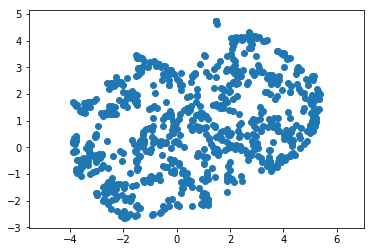

In [547]:
embedding = reducer.fit_transform(NORMED_ASD)
embedding.shape
plt.scatter(embedding[:, 0], embedding[:, 1])
plt.gca().set_aspect('equal', 'datalim')
plt.show()

In [548]:
kmeans = KMeans(n_clusters=4, random_state=20,max_iter=3000).fit(pd.DataFrame(embedding))

NORMED_ASD["CLUSTERING_1"]=kmeans.labels_
NORMED_ASD["CLUSTERING_1"].value_counts()

0    238
3    198
1    184
2    180
Name: CLUSTERING_1, dtype: int64

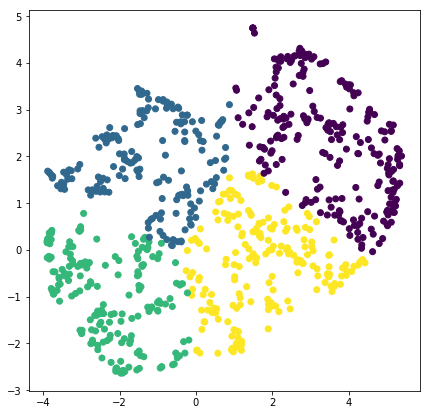

In [549]:
plt.figure(figsize=(7,7))
plt.scatter(embedding[:, 0], embedding[:, 1],c=NORMED_ASD.CLUSTERING_1)
plt.show()

In [550]:
NORMED_ASD["type_norm"]  = labelencoder.fit_transform(data["Type 1"])

In [551]:
NORMED_ASD["type_norm"]  = data["Type 1"]

In [552]:
NORMED_ASD.head()

,Tankiness,Ninja,Slimboys,Fatality,Indestructibility,Shield,Laziness,CLUSTERING_1,type_norm
0,-0.280261,0.165138,-0.000958,0.709752,-1.020467,-0.471249,-0.213926,3,Grass
1,-0.262115,0.156507,-0.000958,0.646969,-0.217614,0.154452,-0.309877,3,Grass
2,-0.266540,0.108916,-0.000958,0.520433,0.621820,0.834674,-0.324558,1,Grass
3,-0.044184,-0.505447,-0.000958,0.521322,1.207984,1.619742,0.046868,1,Grass
4,-0.940147,0.858382,1.070587,0.398387,-1.428045,-1.006871,-0.752665,0,Fire


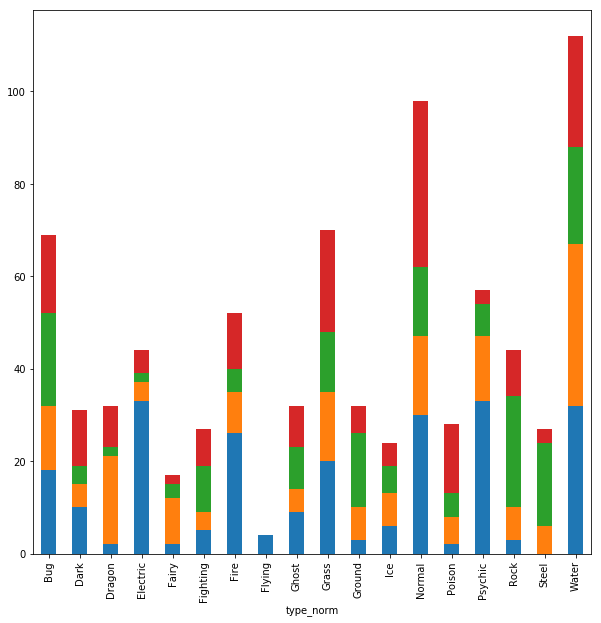

In [563]:
plotdf=NORMED_ASD.groupby(['type_norm','CLUSTERING_1']).agg({'Tankiness':'count'}).unstack().fillna(0)
plotdf.plot(kind='bar', stacked=True, legend=False,figsize=(10,10))

Tankiness


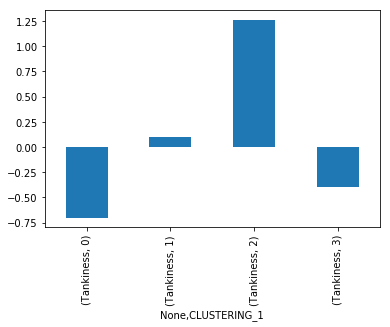

<Figure size 576x576 with 0 Axes>

Ninja


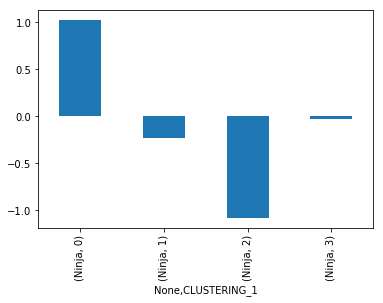

<Figure size 576x576 with 0 Axes>

Slimboys


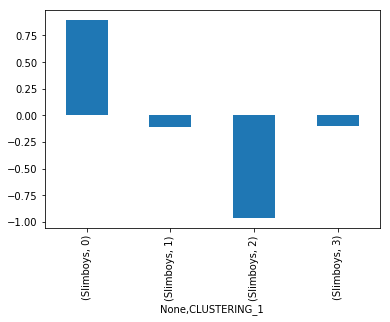

<Figure size 576x576 with 0 Axes>

Fatality


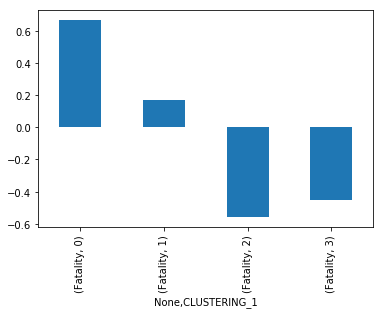

<Figure size 576x576 with 0 Axes>

Indestructibility


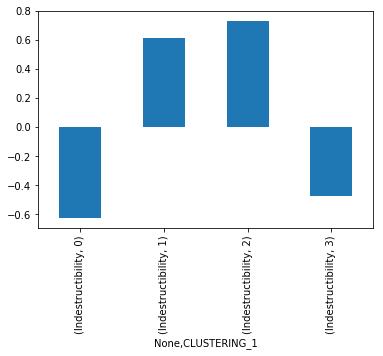

<Figure size 576x576 with 0 Axes>

Shield


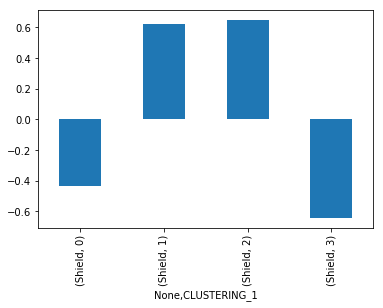

<Figure size 576x576 with 0 Axes>

Laziness


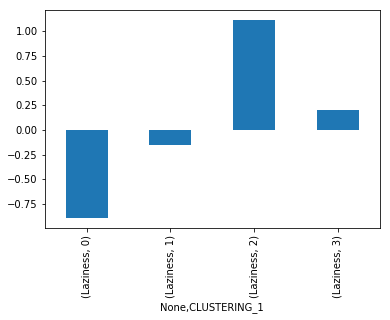

<Figure size 576x576 with 0 Axes>

In [565]:
for col in NORMED_ASD.columns[:-2]:
    print(col)
    NORMED_ASD.groupby(['CLUSTERING_1']).agg({col:'mean'}).unstack().fillna(0).plot(kind='bar')
    plt.figure(figsize=(8,8))
    plt.show()


In [567]:
data["CLUSTER"] = NORMED_ASD.CLUSTERING_1.values

In [570]:
data.loc[data.Name == "Snorlax"]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,types,Tankiness,Ninja,Fatboys,fatality,indistructability,CLUSTER
155,143,Snorlax,Normal,NaN,540,160,110,65,65,110,30,1,False,12,3.0,0.461538,0.1875,0.590909,10400,2


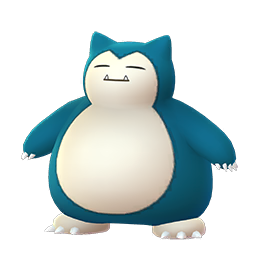

In [569]:
data.loc[data.Name == "Pikachu"]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,types,Tankiness,Ninja,Fatboys,fatality,indistructability,CLUSTER
30,25,Pikachu,Electric,NaN,320,35,55,40,50,50,90,1,False,3,0.282828,2.8125,2.571429,0.909091,1400,0


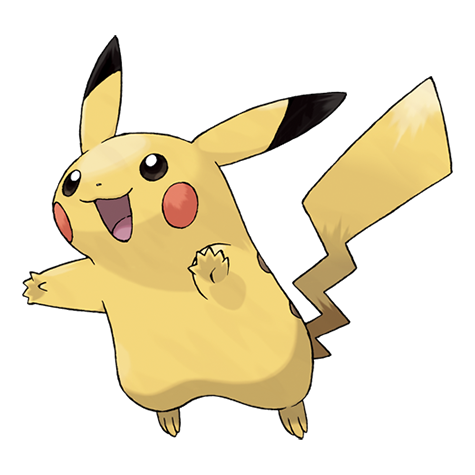

In [572]:
data.loc[data.Name == "Blastoise"]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,types,Tankiness,Ninja,Fatboys,fatality,indistructability,CLUSTER
11,9,Blastoise,Water,NaN,530,79,83,100,85,105,78,1,False,17,1.507387,0.663,0.987342,1.024096,7900,1


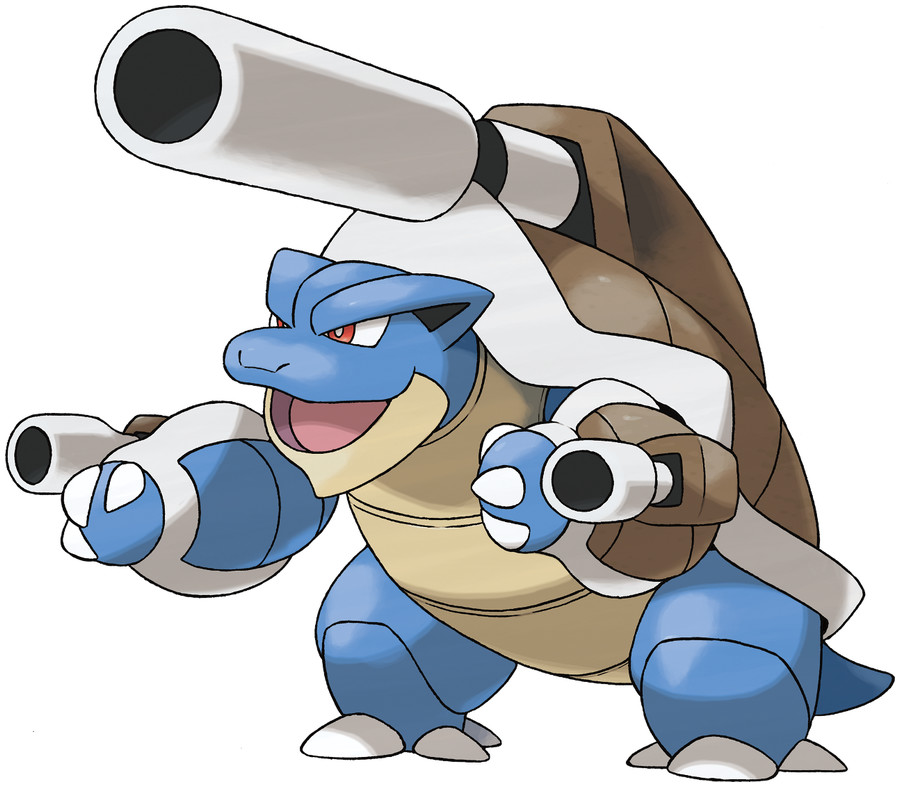

# SOFTIES

In [574]:
data.loc[data.Name == "Bulbasaur"]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,types,Tankiness,Ninja,Fatboys,fatality,indistructability,CLUSTER
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9,1.0,1.218242,1.0,1.326531,2205,3


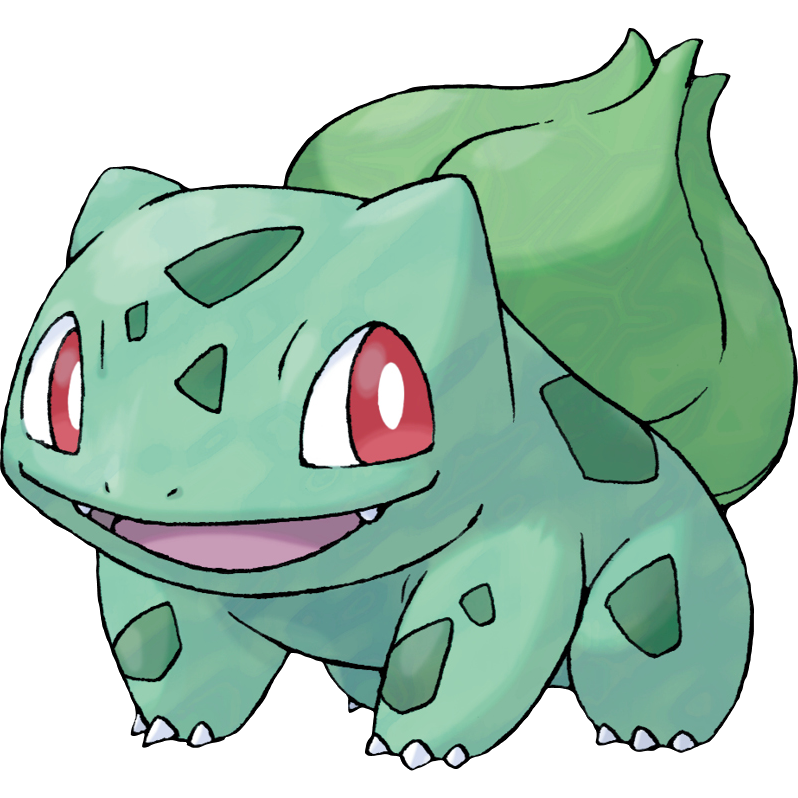